# Exploratory Machine Learning

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [1]:
# import seaborn as sns
# sns.set()
# from scipy import stats

In [29]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [3]:
data_df= pd.read_csv('model_feats/data.csv')

In [4]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
target= np.array(target_df).squeeze()
Npts= len(target)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 265
Total number of features: 46


In [5]:
feats_df.shape

(265, 46)

In [30]:
feats_df.head()

,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,0.602740,0.367123,0.030137,0.000000,0.0,74.0,44.0,0.0,0.043836,0.372603,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,0.715847,0.273224,0.008197,0.002732,0.0,64.0,41.0,0.0,0.040984,0.483607,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,0.517808,0.460274,0.021918,0.000000,0.0,79.0,50.0,0.0,0.030137,0.210959,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,0.673973,0.298630,0.027397,0.000000,0.0,69.0,43.0,0.0,0.076712,0.416438,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,0.586301,0.380822,0.032877,0.000000,0.0,76.0,46.0,0.0,0.032877,0.482192,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


# Linear Regression model

Based on the notebook for the Programming Machine Learning Applications course, present on http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html
and on the tutorial by Jake Vanderplas, present on http://nbviewer.jupyter.org/github/jakevdp/sklearn_tutorial/blob/master/notebooks/Index.ipynb

In [7]:
from sklearn import linear_model
# from scipy.stats import pearsonr

In [8]:
# linreg = linear_model.LinearRegression()
linreg = linear_model.LinearRegression(normalize=True)

NEED TO CHECK STANDARD SCALER

In [9]:
# from sklearn.preprocessing import StandardScaler
# df_X= StandardScaler(feats_df)

# df_X.transform(feats_df)

Train the Linear Regression Model

In [42]:
linreg.fit(feats_df,target_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [53]:
R2= linreg.score(feats_df,target_df)

y_real= target
y_predict= linreg.predict(feats_df)

err = abs(y_predict - y_real)
# err= err.squeeze()
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print RMSE_train

11.1299289012


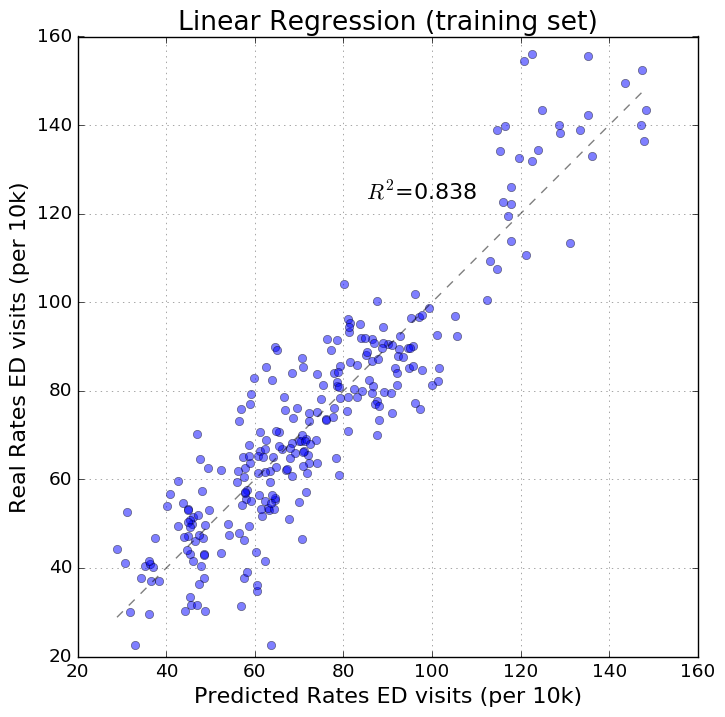

In [44]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_real,'bo',alpha=0.5)

z= np.linspace(np.min(y_predict), np.max(y_predict),10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (training set)')

line= r'$R^2$=%.3f' % R2
plt.text(85,125,line,va='center')
# ax.axes.set_frame_on(False)
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# plt.savefig('LinearRegression_TrainingSet.png')

Regression coefficients

In [45]:
print linreg.coef_
print linreg.intercept_

[  9.84889384e+10   9.84889383e+10   9.84889382e+10   9.84889380e+10
   9.84889383e+10   4.66455290e-01   7.65156460e-01   9.29408681e+11
   9.29408681e+11   9.29408681e+11   9.29408681e+11   9.29408681e+11
   9.29408681e+11   5.85964319e-01   1.52084300e-06   1.41358163e+01
  -7.15918560e+00   5.08738698e-02   2.03990134e+00   5.64326405e+00
   1.74523053e+01   1.45120931e+01   1.01161968e+01   1.66858795e+01
  -9.36771749e+00   4.57177681e+00   4.21075474e+00  -2.19722241e+00
   4.96622849e+01   2.00789796e-01   3.16891275e-02  -2.35305133e+00
   7.79193262e-04   3.01863483e+00  -5.75789654e-04  -1.33223509e-03
   7.46594545e-01  -3.09641592e-01  -5.54911090e-01   1.72515740e+00
  -1.64806931e+02  -1.64864218e+02  -1.64939563e+02  -1.65306115e+02
   2.33846973e+00  -6.40593143e-02]
-1.02789760444e+12


Data is still not normalized

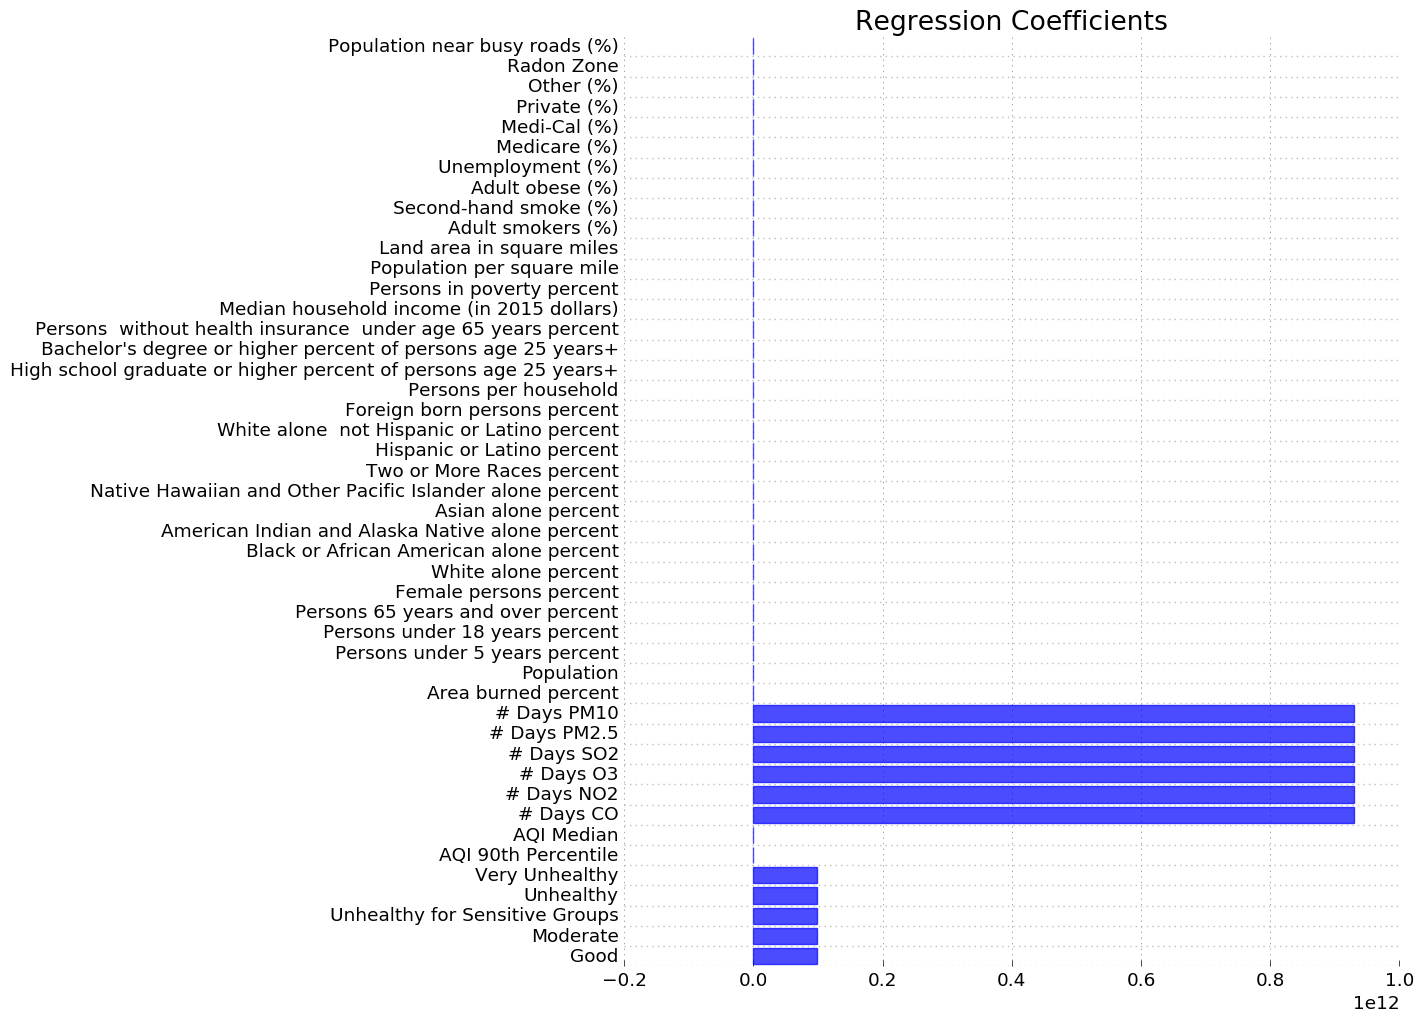

In [47]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(linreg.coef_.squeeze())
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, linreg.coef_.squeeze(), height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_df.columns)
plt.title('Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
xmin,xmax= plt.xlim()
ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

# plt.savefig('LinearRegression_TrainingSet_coeff.png')

In [48]:
linreg.coef_

array([  9.84889384e+10,   9.84889383e+10,   9.84889382e+10,
         9.84889380e+10,   9.84889383e+10,   4.66455290e-01,
         7.65156460e-01,   9.29408681e+11,   9.29408681e+11,
         9.29408681e+11,   9.29408681e+11,   9.29408681e+11,
         9.29408681e+11,   5.85964319e-01,   1.52084300e-06,
         1.41358163e+01,  -7.15918560e+00,   5.08738698e-02,
         2.03990134e+00,   5.64326405e+00,   1.74523053e+01,
         1.45120931e+01,   1.01161968e+01,   1.66858795e+01,
        -9.36771749e+00,   4.57177681e+00,   4.21075474e+00,
        -2.19722241e+00,   4.96622849e+01,   2.00789796e-01,
         3.16891275e-02,  -2.35305133e+00,   7.79193262e-04,
         3.01863483e+00,  -5.75789654e-04,  -1.33223509e-03,
         7.46594545e-01,  -3.09641592e-01,  -5.54911090e-01,
         1.72515740e+00,  -1.64806931e+02,  -1.64864218e+02,
        -1.64939563e+02,  -1.65306115e+02,   2.33846973e+00,
        -6.40593143e-02])

In [ ]:
# from sklearn.cross_validation import train_test_split
# Xtrain, Xtest, ytrain, ytest = train_test_split(feats_df, target_df)
# Xtrain, Xtest, ytrain, ytest = train_test_split(feats_df, target_df,random_state=2)

Use 5-fold cross-validation

In [59]:
from sklearn.cross_validation import KFold

In [65]:
kf = KFold(len(feats_df.columns), n_folds=5, shuffle=True)

z_predict=[]
z_real=[]
crossval_err = 0
for train,test in kf:
    linreg.fit(feats_df.iloc[train],target_df.iloc[train])

    y_predict = linreg.predict(feats_df.iloc[test])
    z_predict.append(y_predict)
    z_real.append(target_df.iloc[test])
    
    err = np.abs(y_predict - target_df.iloc[test]).squeeze()
    crossval_err += np.dot(err,err)
    
RMSE_5CV = np.sqrt(crossval_err/len(feats_df.columns))

In [66]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 11.1299
RMSE on 5-fold CV: 191013587932.5774


In [67]:
z_predict= np.concatenate(z_predict)
z_real= np.concatenate(z_real)

In [68]:
from scipy.stats import pearsonr

r,p = pearsonr(z_predict,z_real)

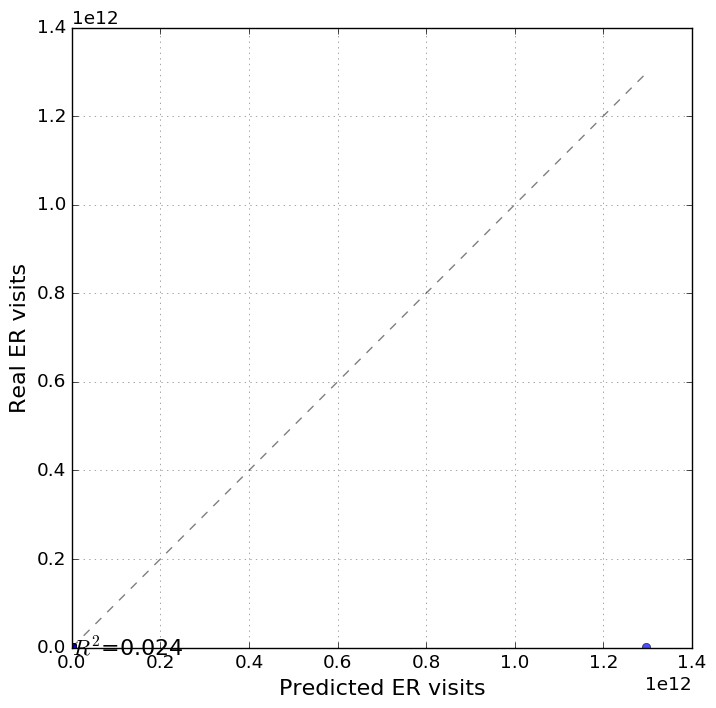

In [69]:
plt.figure(figsize=(8,8))

plt.plot(z_predict, z_real,'bo',alpha=0.7)
z= np.linspace(np.min(z_predict), np.max(z_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')


line= r'$R^2$=%.3f' % (r**2)
plt.text(75,125,line,va='center')

# plt.savefig('LinearRegression_CrossValidation.png')

### Ridge Regression model

In [163]:
ridgereg = linear_model.Ridge(fit_intercept=True, alpha=0.5)

Train the Ridge Regression Model

In [164]:
ridgereg.fit(feats_df,target_df)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
y_predict= ridgereg.predict(feats_df)

err = abs(y_predict - y_real)
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print RMSE_train

12.1823033074


In [166]:
R2= ridgereg.score(feats_df,target_df)

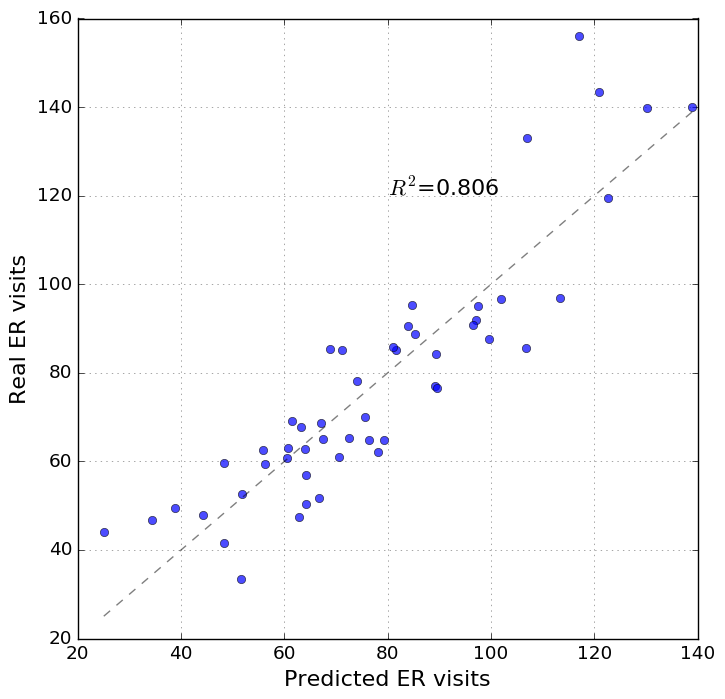

In [167]:
plt.figure(figsize=(8,8))

plt.plot(y_predict, y_real,'bo',alpha=0.7)
z= np.linspace(np.min(y_predict), np.max(y_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')

line= r'$R^2$=%.3f' % R2
plt.text(80,120,line)

# plt.savefig('RidgeRegression_TrainingSet.png')

In [168]:
kf = KFold(len(feats_df.columns), n_folds=5, shuffle=True)

z_predict=[]
z_real=[]
crossval_err = 0
for train,test in kf:
    ridgereg.fit(feats_df.iloc[train],target_df.iloc[train])

    y_predict = ridgereg.predict(feats_df.iloc[test])
    z_predict.append(y_predict)
    z_real.append(target_df.iloc[test])
    
    err = np.abs(y_predict - target_df.iloc[test])
    crossval_err += np.dot(err,err)
    
RMSE_5CV = np.sqrt(crossval_err/len(feats_df.columns))

In [169]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 12.1823
RMSE on 5-fold CV: 255.4516


In [170]:
z_predict= np.concatenate(z_predict)
z_real= np.concatenate(z_real)

In [171]:
r,p = pearsonr(z_predict,z_real)

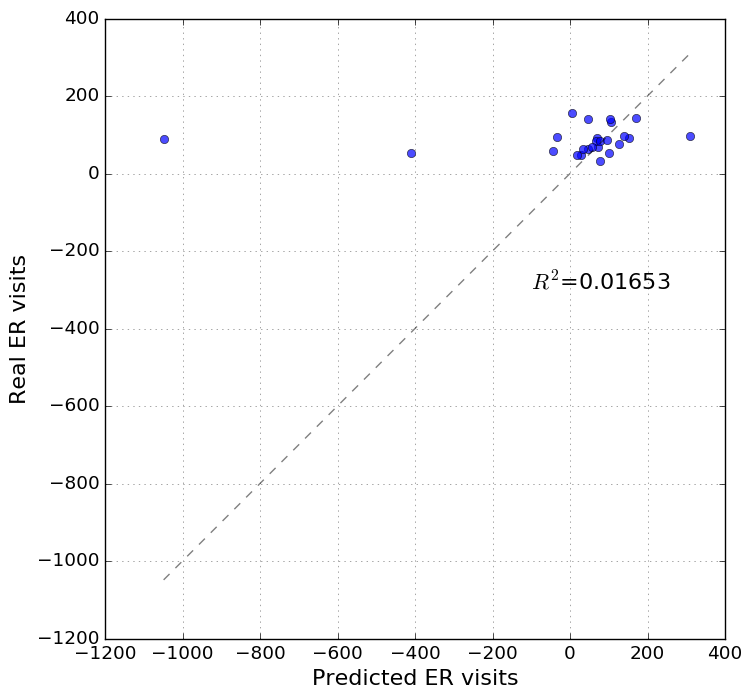

In [174]:
plt.figure(figsize=(8,8))

plt.plot(z_predict, z_real,'bo',alpha=0.7)
z= np.linspace(np.min(z_predict), np.max(z_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')


line= r'$R^2$=%.5f' % (r**2)
plt.text(80,-300,line,ha='center')

# plt.savefig('RidgeRegression_CrossValidation.png')

# SVM regressor

In [ ]:
from sklearn.svm import SVR  # Support Vector Regressor

# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RandomForestRegressor?

In [73]:
model = RandomForestRegressor()
model.fit(feats_df, target_df)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);